<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/1.%20%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC(Natural_Language_Processing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리(Natural Language Processing)

* 자연어는 일상 생활에서 사용하는 언어
* 자연어 처리는 자연어의 의미를 분석 처리하는 일
* 텍스트 분류, 감성 분석, 문서 요약, 번역, 질의 응답, 음성 인식, 챗봇과 같은 응용

## 텍스트 처리

In [1]:
s = "No pain no gain"

In [3]:
"pain" in s

True

In [4]:
print("pain" is s)
print(s is "pain")

False
False


In [5]:
s.split()

['No', 'pain', 'no', 'gain']

In [7]:
print(s.split().index("gain"))
print(s[-4:])

3
gain


In [8]:
s.split()[1]

'pain'

In [9]:
# no가 출력이 될텐데 -1이기 때문에 거꾸로 접근을 하게 되어 no -> on이 된다. 
s.split()[2][::-1]

'on'

In [11]:
k = " 한글도 이렇게 분리가 가능합니다. "

In [14]:
"분리" in k

True

In [13]:
k.split()

['한글도', '이렇게', '분리가', '가능합니다.']

In [15]:
k.split()[0]

'한글도'

## 영어 처리

#### 대소문자 통합

* 대소문자를 통합하지 않는다면 컴퓨터는 같은 단어를 다르게 받아들임
* 파이썬의 내장 함수 `lower()`, `upper()`를 통해 간단하게 통합 가능

### 정규화(Normalization)

### 정규표현식

* 정규 표현식은 특정 문자들을 편리하게 지정하고 추가, 삭제 가능
* 데이터 전처리에서 정규 표현식을 많이 사용
* 파이썬에서는 정규 표현식을 지원하는 `re` 패키지 제공

* 정규 표현식 문법
  
| 특수문자 | 설명 |
| - | - |
| `.` | 앞의 문자 1개를 표현 |
| `?` | 문자 한개를 표현하나 존재할 수도, 존재하지 않을 수도 있음(0개 또는 1개) |
| `*` | 앞의 문자가 0개 이상 |
| `+` | 앞의 문자가 최소 1개 이상 |
| `^` | 뒤의 문자로 문자열이 시작 |
| `\$` | 앞의 문자로 문자열이 끝남 |
| `\{n\}` | `n`번만큼 반복 |
| `\{n1, n2\}` | `n1` 이상, `n2` 이하만큼 반복, n2를 지정하지 않으면 `n1` 이상만 반복 |
| `\[ abc \]` | 안에 문자들 중 한 개의 문자와 매치, a-z처럼 범위도 지정 가능 |
| `\[ ^a \]` | 해당 문자를 제외하고 매치 |
| `a\|b` | `a` 또는 `b`를 나타냄 |

* 정규 표현식에 자주 사용하는 역슬래시(\\)를 이용한 문자 규칙

| 문자 | 설명 |
| - | - |
| `\\` | 역슬래시 자체를 의미 |
| `\d` | 모든 숫자를 의미, [0-9]와 동일 |
| `\D` | 숫자를 제외한 모든 문자를 의미, [^0-9]와 동일 |
| `\s` | 공백을 의미, [ \t\n\r\f\v]와 동일|
| `\S` | 공백을 제외한 모든 문자를 의미, [^ \t\n\r\f\v]와 동일 |
| `\w` | 문자와 숫자를 의미, [a-zA-Z0-9]와 동일 |
| `\W` | 문자와 숫자를 제외한 다른 문자를 의미, [^a-zA-Z0-9]와 동일 |

#### match

* 컴파일한 정규 표현식을 이용해 문자열이 정규 표현식과 맞는지 검사

#### compile

* compile을 사용하면 여러 번 사용할 경우 일반 사용보다 더 빠른 속도를 보임
* compile을 통해 정규 표현식을 사용할 경우 `re`가 아닌 컴파일한 객체 이름을 통해 사용해야 함


#### search

* match와 다르게, search는 문자열의 전체를 검사

#### split

* 정규표현식에 해당하는 문자열을 기준으로 문자열을 나눔

#### sub

* 정규 표현식과 일치하는 부분을 다른 문자열로 교체


#### findall

* 컴파일한 정규 표현식을 이용해 정규 표현식과 맞는 모든 문자(열)을 리스트로 반환


#### finditer

* 컴파일한 정규 표현식을 이용해 정규 표현식과 맞는 모든 문자(열)을 `iterator` 객체로 반환
* `iterator` 객체를 이용하면 생성된 객체를 하나씩 자동으로 가져올 수 있어 처리가 간편함

### 토큰화(Tokenization)

* 특수문자에 대한 처리

  + 단어에 일반적으로 사용되는 알파벳, 숫자와는 다르게 특수문자는 별도의 처리가 필요            
  + 일괄적으로 단어의 특수문자를 제거하는 방법도 있지만 특수문자가 단어에 특별한 의미를 가질 때 이를 학습에 반영시키지 못할 수도 있음
  + 특수문자에 대한 일괄적인 제거보다는 데이터의 특성을 파악하고, 처리를 하는 것이 중요


* 특정 단어에 대한 토큰 분리 방법

  + 한 단어지만 토큰으로 분리할 때 판단되는 문자들로 이루어진 we're, United Kingdom 등의 단어는 어떻게 분리해야 할지 선택이 필요   
  + we're은 한 단어이나 분리해도 단어의 의미에 별 영향을 끼치진 않지만 United Kingdom은 두 단어가 모여 특정 의미를 가리켜 분리해선 안됨
  + 사용자가 단어의 특성을 고려해 토큰을 분리하는 것이 학습에 유리

#### 단어 토큰화

* 파이썬 내장 함수인 `split`을 활용해 단어 토큰화
* 공백을 기준으로 단어를 분리

* 토큰화는 `nltk` 패키지의 `tokenize` 모듈을 사용해 손쉽게 구현 가능
* 단어 토큰화는 `word_tokenize()` 함수를 사용해 구현 가능

['A', 'B', 'J', 'I', 'O', 'A', 'S', 'J', 'F', 'I', 'O', 'J', 'A', 'D', 'F', 'I', 'J', 'O', 'Q', 'I', 'J', 'P', 'O', 'O', 'S', 'I', 'U', 'D', 'F', 'U', 'I', 'O', 'H', 'Q', 'O', 'I', 'J', 'A', 'A', 'A', 'J', 'I', 'J', 'A', 'P', 'S', 'I', 'D', 'J', 'F', 'A', 'I', 'A', 'A', 'I', 'J', 'A', 'P', 'O', 'A', 'J', 'F', 'B']


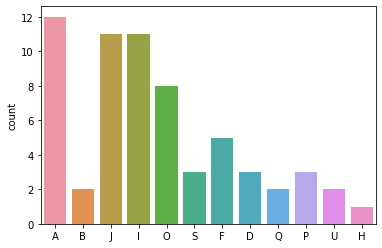

In [16]:
random_seq = "ABJIOASJFIOJADFIJOQIJPOOSIUDFUIOHQOIJAAAJIJAPSIDJFAIAAIJAPOAJFB"

tokens = list(random_seq)
print(tokens)

import seaborn as sns
sns.countplot(x=tokens);

가장 많은 빈도를 보이는 문자는 'A' 입니다. 우리는 이같이 복잡하고 섞여있는 문자들을 눈으로 직접 나누는 작업에 매우매우 취약합니다. 그래서 이 복잡한 데이터를 이해 쉽고 카운트를 하는 등 분석이 가능한 토큰으로 바꾸었습니다.

#### 문장 토큰화

* 문장 토큰화는 줄바꿈 문자('\n')를 기준으로 문장을 분리

* 문장 토큰화는 `sent_tokenize()` 함수를 사용해 구현 가능

* 문장 토큰화에서는 온점(.)의 처리를 위해 이진 분류기를 사용할 수도 있음
* 온점은 문장과 문장을 구분해줄 수도, 문장에 포함된 단어를 구성할 수도 있기 때문에 이를 이진 분류기로 분류해 더욱 좋은 토큰화를 구현할 수도 있음

#### 정규 표현식을 이용한 토큰화

* 토큰화 기능을 직접 구현할 수도 있지만 정규 표현식을 이용해 간단하게 구현할 수도 있음
* `nltk` 패키지는 정규 표현식을 사용하는 토큰화 도구인 `RegexpTokenizer`를 제공

#### 케라스를 이용한 토큰화

#### TextBlob을 이용한 토큰화

#### 기타 토크나이저

* WhiteSpaceTokenizer: 공백을 기준으로 토큰화
* WordPunktTokenizer: 텍스트를 알파벳 문자, 숫자, ㅇ라파벳 이외의 문자 리스트로 토큰화
* MWETokenizer: MWE는 Multi-Word Expression의 약자로 'republic of korea'와 같이 여러 단어로 이뤄진 특정 그룹을 한 개체로 취급
* TweetTokenizer: 트위터에서 사용되는 문장의 토큰화를 위해서 만들어졌으며, 문장 속 감성의 표현과 감정을 다룸

### n-gram 추출

* n-gram은 n개의 어절이나 음절을 연쇄적으로 분류해 그 빈도를 분석
* n=1일 때는 unigram, n=2일 때는 bigram, n=3일 때는 trigram으로 불림

### PoS(Parts of Speech) 태깅 

* PoS는 품사를 의미하며, PoS 태깅은 문장 내에서 단어에 해당하는 각 품사를 태깅

* PoS 태그 리스트

| Number | Tag | Description | 설명 |
| -- | -- | -- | -- |
| 1 | `CC` | Coordinating conjunction |
| 2 | `CD` | Cardinal number |
| 3 | `DT` | Determiner | 한정사
| 4 | `EX` | Existential there |
| 5 | `FW` | Foreign word | 외래어 |
| 6 | `IN` | Preposition or subordinating conjunction | 전치사 또는 종속 접속사 |
| 7 | `JJ` | Adjective | 형용사 |
| 8 | `JJR` | Adjective, comparative | 헝용사, 비교급 |
| 9 | `JJS` | Adjective, superlative | 형용사, 최상급 |
| 10 | `LS` | List item marker |
| 11 | `MD` | Modal |
| 12 | `NN` | Noun, singular or mass | 명사, 단수형 |
| 13 | `NNS` | Noun, plural | 명사, 복수형 |
| 14 | `NNP` | Proper noun, singular | 고유명사, 단수형 |
| 15 | `NNPS` | Proper noun, plural | 고유명사, 복수형 |
| 16 | `PDT` | Predeterminer | 전치한정사 |
| 17 | `POS` | Possessive ending | 소유형용사 |
| 18 | `PRP` | Personal pronoun | 인칭 대명사 |
| 19 | `PRP$` | Possessive pronoun | 소유 대명사 |
| 20 | `RB` | Adverb | 부사 |
| 21 | `RBR` | Adverb, comparative | 부사, 비교급 |
| 22 | `RBS` | Adverb, superlative | 부사, 최상급 |
| 23 | `RP` | Particle |
| 24 | `SYM` | Symbol | 기호
| 25 | `TO` | to |
| 26 | `UH` | Interjection | 감탄사 |
| 27 | `VB` | Verb, base form | 동사, 원형 |
| 28 | `VBD` | Verb, past tense | 동사, 과거형 |
| 29 | `VBG` | Verb, gerund or present participle | 동사, 현재분사 |
| 30 | `VBN` | Verb, past participle | 동사, 과거분사 |
| 31 | `VBP` | Verb, non-3rd person singular present | 동사, 비3인칭 단수 |
| 32 | `VBZ` | Verb, 3rd person singular present | 동사, 3인칭 단수 |
| 33 | `WDT` | Wh-determiner |
| 34 | `WP` | Wh-pronoun |
| 35 | `WP$` | Possessive wh-pronoun |
| 36 | `WRB` | Wh-adverb |


### 불용어 제거

* 영어의 전치사(on, in), 한국어의 조사(을, 를) 등은 분석에 필요하지 않은 경우가 많음
* 길이가 짧은 단어, 등장 빈도 수가 적은 단어들도 분석에 큰 영향을 주지 않음
* 일반적으로 사용되는 도구들은 해당 단어들을 제거해주지만 완벽하게 제거되지는 않음
* 사용자가 불용어 사전을 만들어 해당 단어들을 제거하는 것이 좋음
* 도구들이 걸러주지 않는 전치사, 조사 등을 불용어 사전을 만들어 불필요한 단어들을 제거


* `nltk` 패키지에 불용어 리스트 사용

### 철자 교정

* 텍스트에 오탈자가 존재하는 경우가 있음
* 예를 들어, 단어 'apple'을 'aplpe'과 같이 철자 순서가 바뀌거나 spple 같이 철자가 틀릴 수 있음
* 사람이 적절한 추정을 통해 이해하는데는 문제가 없지만, 컴퓨터는 이러한 단어를 그대로 받아들여 처리가 필요
* 철자 교정 알고리즘은 이미 개발되어 워드 프로세서나 다양한 서비스에서 많이 적용됨
됨

### 언어의 단수화와 복수화

### 어간(Stemming) 추출

### 표제어(Lemmatization) 추출

### 개체명 인식(Named Entity Recognition)



### 단어 중의성(Lexical Ambiguity)

## 한국어 처리

### 정규표현식

* 한국어 정규 표현식도 대부분의 문법은 영어 정규 표현식과 같음
* 한국어는 자음과 모음이 분리되어 있기 때문에, 문법을 지정할 때는 자음과 모음을 동시에 고려해야 함

#### match

* 컴파일한 정규 표현식을 이용해 문자열이 정규 표현식과 맞는지 검사

#### search

* match와 다르게, search는 문자열의 전체를 검사

#### sub

* 정규 표현식과 일치하는 부분을 다른 문자열로 교체

### 토큰화(Tokenization)

* 한국어를 학습 데이터를 사용할 때는 언어의 특성으로 인해 추가로 고려해야 할 사항이 존재
* 한국어는 띄어쓰기를 준수하지 않아도 의미가 전달되는 경우가 많아 띄어쓰기가 지켜지지 않을 가능성이 존재
* 띄어쓰기가 지켜지지 않으면 정상적인 토큰 분리가 이루어지지 않음
* 한국어는 형태소라는 개념이 존재해 추가로 고려해주어야만 함
* '그는', '그가' 등의 단어들은 같은 의미를 가리키지만 텍스트 처리에서는 다르게 받아들일 수 있어 처리를 해줘야 함

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

#### 단어 토큰화

* 한국어는 공백으로 단어를 분리해도 조사, 접속사 등이 남아 분석에 어려움이 있음
* 이를 해결해주는 한국어 토큰화는 조사, 접속사를 분리해주거나 제거
* 한국어 토큰화를 사용하기 위해선 `konlpy`와 `mecab`이라는 라이브러리가 필요

* 토큰화만 실행할 때는 `tagger.morphs()`라는 함수를 이용

* 형태소만 사용하고 싶을 때는 `tagger.nouns()`라는 함수를 이용해 조사, 접속사 등을 제거 가능

#### 문장 토큰화

* 한국어 문장을 토큰화할 때는 kss(korean sentence splitter) 라이브러리 이용

* 라이브러리를 이용해도 한국어에는 전치 표현이 존재해 제대로 토큰화가 안됨
* 좀 더 나은 학습을 위해 사용자는 해당 부분을 따로 처리해주어야만 함

#### 정규 표현식을 이용한 토큰화

* 한국어도 정규 표현식을 이용해 토큰화 가능

#### 케라스를 이용한 토큰화

#### TextBlob을 이용한 토큰화

## Bag of Words(BoW)

## 문서 단어 행렬(DTM)

* 문서 단어 행렬(Document-Term Matrix)은 문서에 등장하는 여러 단어들의 빈도를 행렬로 표현
* 각 문서에 대한 BoW를 하나의 행렬로 표현한 것

## 어휘 빈도-문서 역빈도(TF-IDF) 분석

* 어휘 빈도-문서 역빈도(TF-IDF; Term Frequency-Inverse Docunment Frequency)는 단순히 빈도수가 높은 단어가 핵심어가 아닌, 특정 문서에서만 집중적으로 등장할 때 해당 단어가 문서의 주제를 잘 담고 있는 핵심어라고 가정

* 특정 문서에서 특정단어가 많이 등장하고 그 단어가 다른 문서에서 적게 등장할 때, 그 단어를 특정 문서의 핵심어로 간주
* 어휘 빈도-문서 역빈도는 어휘 빈도와 역문서 빈도를 곱해 계산 가능

* **어휘 빈도**는 특정 문서에서 특정 단어가 많이 등장하는 것을 의미

$$ tf_{x,y} $$

* **역문서 빈도**는 다른 문서에서 등장하지 않는 단어 빈도를 의미

$$ log(N/df_x) $$      

* **어휘 빈도-문서 역빈도**는 다음과 같이 표현

$$ W_{x,y} = tf_{x,y} * log(N/df_x) $$

* tf-idf를 편리하게 계산하기 위해 `scikit-learn`의 `tfidfvectorizer`를 이용
* 앞서 계산한 단어 빈도 수를 입력하여 tf-idf로 변환

* 좀 더 편리하게 확인하기 위해 데이터프레임으로 변환